In [1]:
from roc2pr import PRCurve
from numpy import allclose
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set(font='DejaVu Sans')
%matplotlib inline

Define points on an example precision-recall curve. We assume a ratio of 1/4 actual positives to actual negatives

In [2]:
recall_vals = [0.05, 0.1, 0.25, 0.4, 0.5, 0.6, 0.7]
precision_vals = [0.8, 0.6, 0.5, 0.3, 0.25, 0.2, 0.18]
pr_points = zip(recall_vals, precision_vals)

Create the PRCurve instance.

In [3]:
pr = PRCurve(pr_points, pos_neg_ratio=0.25)

Resample, to get another precision-recall curve, with 100 points!

In [4]:
pr_sampled = pr.resample(num_points=100)

Convert to a ROC curve.

In [5]:
roc = pr.to_roc()

We can resample this ROC curve, as well!

In [6]:
roc_sampled = roc.resample(num_points=100)

Get the points (as a list of 2-tuples) on any curve with the *.points()* method.

In [7]:
pr_points = pr.points()
pr_sampled_points = pr_sampled.points()
roc_points = roc.points()
roc_sampled_points = roc_sampled.points()

You can re-convert the ROC curve back to a PR curve!

In [8]:
pr_reconverted = roc.to_pr()

Let's check that the reconversion was correct.

In [9]:
assert allclose(pr_reconverted.points(), pr.points())

Finally, let's plot everything!

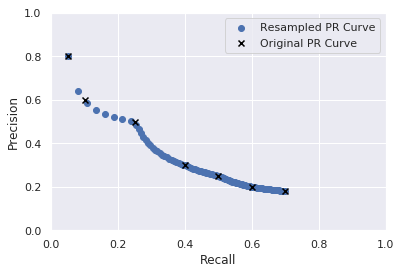

In [12]:
plt.scatter(*zip(*pr_sampled_points), label='Resampled PR Curve', marker='o')
plt.scatter(*zip(*pr_points), label='Original PR Curve', color='black', marker='x')
plt.legend()
plt.xlabel('Recall')
plt.xlim((0, 1))
plt.ylabel('Precision')
plt.ylim((0, 1))
plt.title('Resampling a Precision-Recall Curve')
plt.show()

We can see that the PR curve is not linearly interpolated! But the ROC curve will be!

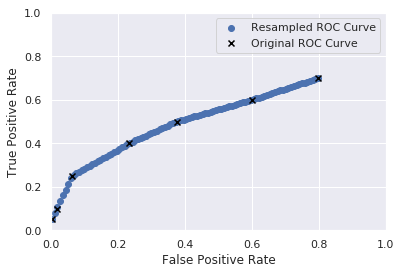

In [13]:
plt.scatter(*zip(*roc_sampled_points), label='Resampled ROC Curve', marker='o')
plt.scatter(*zip(*roc_points), label='Original ROC Curve', color='black', marker='x')
plt.legend()
plt.xlabel('False Positive Rate')
plt.xlim((0, 1))
plt.ylabel('True Positive Rate')
plt.ylim((0, 1))
plt.title('Resampling a ROC Curve')
plt.show()